In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Step1:Loading the dataset
data = pd.read_json(r'C:\Users\ravin\Downloads\fashion_products_data.ldjson', lines=True)
 


In [3]:
# Step 2: Exploring data features
print("Column Names:", data.columns)

Column Names: Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name',
       'image_urls__small', 'medium', 'large', 'browsenode', 'brand',
       'sales_price', 'weight', 'rating', 'sales_rank_in_parent_category',
       'sales_rank_in_child_category', 'delivery_type', 'meta_keywords',
       'amazon_prime__y_or_n', 'parent___child_category__all',
       'best_seller_tag__y_or_n', 'other_items_customers_buy',
       'product_details__k_v_pairs', 'discount_percentage', 'colour',
       'no__of_reviews', 'seller_name', 'seller_id', 'left_in_stock',
       'no__of_offers', 'no__of_sellers', 'technical_details__k_v_pairs',
       'formats___editions', 'name_of_author_for_books'],
      dtype='object')


In [4]:
print("Data Types:\n", data.dtypes)

Data Types:
 uniq_id                           object
crawl_timestamp                   object
asin                              object
product_url                       object
product_name                      object
image_urls__small                 object
medium                            object
large                             object
browsenode                       float64
brand                             object
sales_price                      float64
weight                            object
rating                           float64
sales_rank_in_parent_category     object
sales_rank_in_child_category      object
delivery_type                     object
meta_keywords                     object
amazon_prime__y_or_n              object
parent___child_category__all      object
best_seller_tag__y_or_n           object
other_items_customers_buy         object
product_details__k_v_pairs        object
discount_percentage               object
colour                            object
no_

In [5]:
print("Shape:", data.shape)


Shape: (30000, 33)


In [6]:
print("Null Values:\n", data.isnull().sum())


Null Values:
 uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   26548
seller_name

In [7]:
print("First 5 Rows:\n", data.head())

First 5 Rows:
                             uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...   
2  LOVISTA 

In [8]:
# Step 3: Dropping unnecessary features, keeping only the necessary columns
data.columns = data.columns.str.strip()
filtered_data = data[['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']]

# Display the first few rows to verify the columns
print(filtered_data.head())

         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By P

In [9]:
# Check for null values in the filtered dataset
print("Null Values:\n", filtered_data.isnull().sum())


Null Values:
 asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64


In [10]:
# Create a copy of the filtered data to avoid working on a view
filtered_data = data[['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']].copy()

# Fill null values in 'sales_price' with the mean
filtered_data.loc[:, 'sales_price'] = filtered_data['sales_price'].fillna(filtered_data['sales_price'].mean())

# Fill null values in 'rating' with the mean
filtered_data.loc[:, 'rating'] = filtered_data['rating'].fillna(filtered_data['rating'].mean())

# Fill missing 'brand' with 'Unknown'
filtered_data.loc[:, 'brand'] = filtered_data['brand'].fillna('Unknown')

# Drop rows where 'product_name' is null
filtered_data = filtered_data.dropna(subset=['product_name'])



In [11]:
# Check for null values and handle them accordingly
if filtered_data['sales_price'].isnull().any():
    filtered_data.loc[:, 'sales_price'] = filtered_data['sales_price'].fillna(filtered_data['sales_price'].median())

if filtered_data['rating'].isnull().any():
    filtered_data.loc[:, 'rating'] = filtered_data['rating'].fillna(filtered_data['rating'].median())

if filtered_data['meta_keywords'].isnull().any():
    filtered_data.loc[:, 'meta_keywords'] = filtered_data['meta_keywords'].fillna('Unknown')

if filtered_data['brand'].isnull().any():
    filtered_data.loc[:, 'brand'] = filtered_data['brand'].fillna('Unknown')

if filtered_data['medium'].isnull().any():
    filtered_data.loc[:, 'medium'] = filtered_data['medium'].fillna('No Image')

# Remove duplicates explicitly
filtered_data = filtered_data.drop_duplicates()

# Verify changes
print("Number of duplicates:", filtered_data.duplicated().sum())
print("Updated Shape:", filtered_data.shape)
print(filtered_data.head())


Number of duplicates: 0
Updated Shape: (30000, 8)
         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Ka

In [12]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in sales_price and rating columns
outliers_sales_price = detect_outliers_iqr(filtered_data, 'sales_price')
outliers_rating = detect_outliers_iqr(filtered_data, 'rating')

print(f"Outliers in sales_price: {len(outliers_sales_price)}")
print(f"Outliers in rating: {len(outliers_rating)}")


Outliers in sales_price: 2746
Outliers in rating: 591


In [13]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
filtered_data = remove_outliers_iqr(filtered_data, 'sales_price')
filtered_data = remove_outliers_iqr(filtered_data, 'rating')


        sales_price        rating
count  26701.000000  26701.000000
mean     626.594308      4.084619
std      302.799214      0.725893
min       39.000000      1.600000
25%      379.000000      3.600000
50%      594.000000      4.000000
75%      862.172397      4.900000
max     1556.000000      5.000000
Axes(0.125,0.11;0.775x0.77)


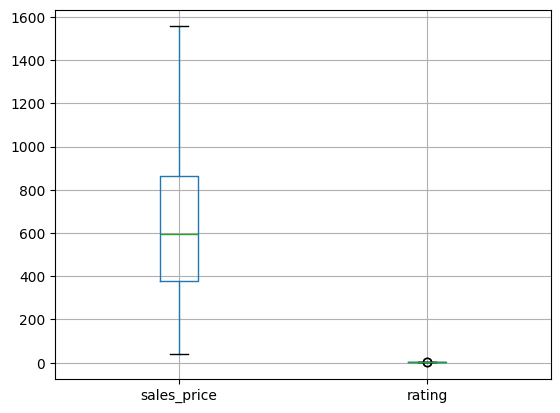

In [14]:
print(filtered_data.describe())  # Check summary statistics
print(filtered_data[['sales_price', 'rating']].boxplot())  # Visualize box plot


In [15]:
# Sort the rows based on the 'product_name' column
filtered_data = filtered_data.sort_values(by='product_name', ascending=True)

# Reset the index after sorting
filtered_data.reset_index(drop=True, inplace=True)

# Verify the changes
print(filtered_data.head())  # Display the first few rows to confirm sorting


         asin                                        product_url  \
0  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
1  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
2  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
3  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
4  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                        product_name  sales_price  rating  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   150.000000     5.0   
1  "Adventure" Belt; 1.25"(32mm) Nickel Free; Dai...   862.172397     4.3   
2                    '47 NHL Men's Neps Football Tee   862.172397     3.6   
3  (Free Delivery) Women 2hook Bra Extender Combo...   249.000000     5.0   
4  001 Girls Shopping Sleeveless Denim Jacket for...   633.000000     5.0   

                                       meta_keywords  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   
1  "Adventure" B

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import enchant  # For detecting English words

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stemmer, lemmatizer, and English word checker
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
english_dict = enchant.Dict("en_US")  # Initialize English dictionary

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess product names
def preprocess_text(text):
    # Remove special characters and non-alphabetic words
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
    # Tokenize text
    tokens = text.lower().split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Remove non-English words
    tokens = [word for word in tokens if english_dict.check(word)]
    # Apply stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    # Join tokens back into a string
    return ' '.join(lemmatized_tokens)

# Apply preprocessing to the 'product_name' column
filtered_data['product_name'] = filtered_data['product_name'].apply(preprocess_text)

# Verify changes
print(filtered_data['product_name'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ravin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0    ice cotton round neck half sleev print girl white
1    adventur belt mm nickel free daili use metal s...
2                                          footbal tee
3       free deliveri woman hook bra extend combo pack
4              girl shop sleeveless denim jacket woman
Name: product_name, dtype: object


In [17]:
print(filtered_data.head())

         asin                                        product_url  \
0  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
1  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
2  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
3  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
4  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                        product_name  sales_price  rating  \
0  ice cotton round neck half sleev print girl white   150.000000     5.0   
1  adventur belt mm nickel free daili use metal s...   862.172397     4.3   
2                                        footbal tee   862.172397     3.6   
3     free deliveri woman hook bra extend combo pack   249.000000     5.0   
4            girl shop sleeveless denim jacket woman   633.000000     5.0   

                                       meta_keywords  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   
1  "Adventure" B

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Vectorize the preprocessed product names using Bag of Words (sparse matrix)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_data['product_name'])

# Step 2: Get the product index for the given ASIN (example)
asin_value = 'B07GWJ9Z1F'  # Replace with the ASIN you want to test
product_idx = filtered_data[filtered_data['asin'] == asin_value].index[0]

# Step 3: Get the vector for the target product
target_product_vec = X[product_idx]

# Step 4: Compute cosine similarity between the target product and all other products (sparse matrix)
similarity_scores = cosine_similarity(target_product_vec, X).flatten()

# Step 5: Sort the similarity scores in descending order and exclude the product itself
sorted_indices = similarity_scores.argsort()[-6:-1][::-1]  # Top 5 similar products in descending order
recommended_products = filtered_data.iloc[sorted_indices]

# Display the recommended products
print("Recommended Products:")
for idx, row in recommended_products.iterrows():
    print(f"Product Name: {row['product_name']}")
    print(f"Similarity Score: {similarity_scores[idx]:.4f}")
    print(f"Product URL: {row['product_url']}")
    print(f"Sales Price: ₹{row['sales_price']}, Rating: {row['rating']}")
    print()


Recommended Products:
Product Name: innov denim woman print sleeveless jacket
Similarity Score: 0.6667
Product URL: https://www.amazon.in/Innovative-Denim-printed-sleeveless-jacket/dp/B079Q83FC8/
Sales Price: ₹1330.0, Rating: 5.0

Product Name: denim shirt woman girl
Similarity Score: 0.6124
Product URL: https://www.amazon.in/STC-Denim-Shirt-Women-Girls/dp/B07WS14WVQ/
Sales Price: ₹429.0, Rating: 5.0

Product Name: woman denim jacket size
Similarity Score: 0.6124
Product URL: https://www.amazon.in/Romile-Party-wear-Fancy-Size/dp/B07D2C583Z/
Sales Price: ₹399.0, Rating: 3.5

Product Name: girl jacket
Similarity Score: 0.5774
Product URL: https://www.amazon.in/nauti-nati-Girls-Jacket-NAW16-625A-12-18M-Navy/dp/B01L74APN4/
Sales Price: ₹594.0, Rating: 5.0

Product Name: top woman girl woman girl made cotton girl top combo
Similarity Score: 0.5270
Product URL: https://www.amazon.in/Fasha%C2%AE-Women-Girls-Tshirts-Cotton/dp/B07VQLN2M9/
Sales Price: ₹299.0, Rating: 5.0



In [19]:
#bagofwords
from IPython.display import HTML, display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests

# Step 1: Vectorize the preprocessed product names using Bag of Words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_data['product_name'])

# Step 2: Get the product index for the given ASIN
asin_value = 'B07QCYNW3C'  # Replace with the ASIN you want to test
product_idx = filtered_data[filtered_data['asin'] == asin_value].index[0]

# Step 3: Get the vector for the target product
target_product_vec = X[product_idx]

# Step 4: Compute cosine similarity between the target product and all other products
similarity_scores = cosine_similarity(target_product_vec, X).flatten()

# Step 5: Sort the similarity scores in descending order and exclude the product itself
sorted_indices = similarity_scores.argsort()[-6:-1][::-1]  # Top 5 similar products in descending order
recommended_products = filtered_data.iloc[sorted_indices]

# Step 6: Generate HTML for displaying the recommended products
html_content = "<h2>Recommended Products:</h2><div style='display: flex; flex-wrap: wrap; gap: 20px;'>"

for idx, row in recommended_products.iterrows():
    # Check if the image URL is valid
    image_url = row.get('medium', None)
    if not (image_url and isinstance(image_url, str)):
        image_url = "https://via.placeholder.com/150?text=No+Image"
    
    # Creating a clean layout for each product
    html_content += f"""
    <div style="border: 1px solid #ddd; border-radius: 8px; padding: 20px; width: 280px; background-color: #f9f9f9; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
        <div style="text-align: center; margin-bottom: 15px;">
            <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
        </div>
        <h4 style="font-size: 16px; text-align: center; color: #333;">{row['product_name']}</h4>
        <p style="font-size: 14px; text-align: center; color: #888; margin: 5px 0;">Similarity Score: {similarity_scores[idx]:.4f}</p>
        <table style="width: 100%; font-size: 12px; margin-top: 10px; border-collapse: collapse;">
            <tr><td style="padding: 5px; border-bottom: 1px solid #ddd; font-weight: bold;">Product URL:</td><td style="padding: 5px; border-bottom: 1px solid #ddd;"><a href="{row['product_url']}" target="_blank" style="color: #0073e6; text-decoration: none;">View Product</a></td></tr>
            <tr><td style="padding: 5px; border-bottom: 1px solid #ddd; font-weight: bold;">Sales Price:</td><td style="padding: 5px; border-bottom: 1px solid #ddd;">₹{row['sales_price']}</td></tr>
            <tr><td style="padding: 5px; border-bottom: 1px solid #ddd; font-weight: bold;">Rating:</td><td style="padding: 5px; border-bottom: 1px solid #ddd;">{row['rating']}</td></tr>
            <tr><td style="padding: 5px; border-bottom: 1px solid #ddd; font-weight: bold;">ASIN:</td><td style="padding: 5px; border-bottom: 1px solid #ddd;">{row['asin']}</td></tr>
        </table>
    </div>
    """
    
html_content += "</div>"

# Step 7: Display the HTML content
display(HTML(html_content))


Product URL:,View Product
Sales Price:,₹534.0
Rating:,4.0
ASIN:,B07D5YZ7RD
Product URL:,View Product
Sales Price:,₹534.0
Rating:,5.0
ASIN:,B07B96BVF6
Product URL:,View Product
Sales Price:,₹449.0
Rating:,5.0


In [20]:
#tdidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from IPython.display import display, HTML
import requests

# Step 1: Use TfidfVectorizer to convert the product names to a sparse TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_data['product_name'])

# Step 2: Calculate cosine similarity between all products (keep the result sparse)
cosine_sim = cosine_similarity(X, X, dense_output=False)

# Step 3: Function to check if the image URL is valid
def is_valid_image_url(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200 and "image" in response.headers.get("Content-Type", "")
    except requests.RequestException:
        return False

# Step 4: Function to generate HTML for recommendations
def get_recommendations(asin_value, cosine_sim, data):
    # Get the index of the product corresponding to the ASIN value
    product_idx = data[data['asin'] == asin_value].index[0]

    # Get the similarity scores for the given product
    similarity_scores = cosine_sim[product_idx].toarray().flatten()  # Convert sparse result to dense for indexing

    # Sort the products by similarity scores in descending order (excluding the product itself)
    sorted_indices = similarity_scores.argsort()[-6:-1][::-1]  # Top 5 similar products
    
    # Get the recommended products based on sorted indices
    recommended_products = data.iloc[sorted_indices]

    # HTML to display recommendations
    html_content = "<h3>Recommended Products:</h3><div style='display: flex; flex-wrap: wrap;'>"

    for idx, row in recommended_products.iterrows():
        # Check if the image URL is valid
        image_url = row.get('medium', None)
        if not (image_url and isinstance(image_url, str) and is_valid_image_url(image_url)):
            image_url = "https://via.placeholder.com/150?text=No+Image"

        # Add product details to the HTML
        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 5px; padding: 10px; margin: 10px; width: 200px; text-align: center;">
            <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 5px;">
            <h4 style="font-size: 14px; margin: 10px 0;">{row['product_name']}</h4>
            <p style="font-size: 12px; margin: 5px 0;">Similarity Score: {similarity_scores[idx]:.4f}</p>
            <p style="font-size: 12px; margin: 5px 0;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 12px; margin: 5px 0;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 12px; color: blue;">View Product</a>
        </div>
        """

    html_content += "</div>"

    # Display the HTML
    display(HTML(html_content))

# Test with an example ASIN
asin_value = 'B07QCYNW3C'  # Replace this with any ASIN to test
get_recommendations(asin_value, cosine_sim, filtered_data)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from IPython.display import display, HTML
import requests

# Step 1: Use TfidfVectorizer to convert the product names to a sparse TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_data['product_name'])

# Step 2: Calculate cosine similarity between all products (keep the result sparse)
cosine_sim = cosine_similarity(X, X, dense_output=False)

# Step 3: Function to check if the image URL is valid
def is_valid_image_url(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200 and "image" in response.headers.get("Content-Type", "")
    except requests.RequestException:
        return False

# Step 4: Function to generate HTML for recommendations
def get_recommendations(asin_value, cosine_sim, data):
    # Get the index of the product corresponding to the ASIN value
    product_idx = data[data['asin'] == asin_value].index[0]

    # Get the similarity scores for the given product
    similarity_scores = cosine_sim[product_idx].toarray().flatten()  # Convert sparse result to dense for indexing

    # Sort the products by similarity scores in descending order (excluding the product itself)
    sorted_indices = similarity_scores.argsort()[-7:-1][::-1]  # Top 5 similar products
    
    # Get the recommended products based on sorted indices
    recommended_products = data.iloc[sorted_indices]

    # HTML to display recommendations
    html_content = """
    <h3 style="font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 20px;">Recommended Products</h3>
    <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px;">

    """

    for idx, row in recommended_products.iterrows():
        # Check if the image URL is valid
        image_url = row.get('medium', None)
        if not (image_url and isinstance(image_url, str) and is_valid_image_url(image_url)):
            image_url = "https://via.placeholder.com/150?text=No+Image"

        # Add product details to the HTML
        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 250px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <div style="text-align: center; margin-bottom: 10px;">
                <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
            </div>
            <h4 style="font-size: 16px; font-weight: bold; color: #333; margin-bottom: 8px;">{row['product_name']}</h4>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Similarity Score: <span style="color: #0073e6;">{similarity_scores[idx]:.4f}</span></p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 14px; color: #0073e6; text-decoration: none;">View Product</a>
        </div>
        """

    html_content += "</div>"

    # Display the HTML
    display(HTML(html_content))

# Test with an example ASIN
asin_value = 'B07QCYNW3C'  # Replace this with any ASIN to test
get_recommendations(asin_value, cosine_sim, filtered_data)


In [22]:
#word2vec
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from IPython.display import display, HTML
import requests
import numpy as np

# Step 1: Preprocess the product names (Tokenize the names into words using split())
def preprocess_product_names(data):
    return [product_name.lower().split() for product_name in data['product_name']]

# Step 2: Train the Word2Vec model on the tokenized product names
def train_word2vec_model(tokenized_data):
    model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
    model.save("word2vec.model")  # Optionally save the model for later use
    return model

# Step 3: Create a vector for each product by averaging the word vectors of its name
def get_product_vector(product_name, model):
    tokenized_name = product_name.lower().split()  # Tokenize the product name using split()
    word_vectors = [model.wv[word] for word in tokenized_name if word in model.wv]
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # If no word vectors, return a zero vector

# Step 4: Calculate cosine similarity and recommend products
def get_recommendations(asin_value, model, data):
    # Tokenize the product names and train the model
    tokenized_data = preprocess_product_names(data)
    word2vec_model = train_word2vec_model(tokenized_data)

    # Get the index of the product corresponding to the ASIN value
    product_idx = data[data['asin'] == asin_value].index[0]

    # Get the vector for the target product
    target_product_vector = get_product_vector(data.iloc[product_idx]['product_name'], word2vec_model)

    # Generate product vectors for all products
    product_vectors = [get_product_vector(name, word2vec_model) for name in data['product_name']]

    # Compute cosine similarity between the target product and all other products
    similarity_scores = cosine_similarity([target_product_vector], product_vectors).flatten()

    # Sort the products by similarity scores in descending order (excluding the product itself)
    sorted_indices = similarity_scores.argsort()[-6:-1][::-1]  # Top 5 similar products
    
    # Get the recommended products based on sorted indices
    recommended_products = data.iloc[sorted_indices]

    # HTML to display recommendations
    html_content = """
    <h3 style="font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 20px;">Recommended Products</h3>
    <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px;">
    """

    for idx, row in recommended_products.iterrows():
        # Check if the image URL is valid
        image_url = row.get('medium', None)
        if not (image_url and isinstance(image_url, str) and is_valid_image_url(image_url)):
            image_url = "https://via.placeholder.com/150?text=No+Image"

        # Add product details to the HTML
        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 250px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <div style="text-align: center; margin-bottom: 10px;">
                <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
            </div>
            <h4 style="font-size: 16px; font-weight: bold; color: #333; margin-bottom: 8px;">{row['product_name']}</h4>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Similarity Score: <span style="color: #0073e6;">{similarity_scores[idx]:.4f}</span></p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 14px; color: #0073e6; text-decoration: none;">View Product</a>
        </div>
        """

    html_content += "</div>"

    # Display the HTML
    display(HTML(html_content))

# Test with an example ASIN
asin_value = 'B07QCYNW3C'  # Replace this with any ASIN to test
tokenized_data = preprocess_product_names(filtered_data)  # Tokenize the product names
word2vec_model = train_word2vec_model(tokenized_data)  # Train the model
get_recommendations(asin_value, word2vec_model, filtered_data)  # Call the function with the trained model


In [23]:
#tdidf and word2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import requests

# Step 1: Preprocess the product names (Tokenize the names into words using split())
def preprocess_product_names(data):
    return [product_name.lower().split() for product_name in data['product_name']]

# Step 2: Train the Word2Vec model on the tokenized product names
def train_word2vec_model(tokenized_data):
    model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
    model.save("word2vec.model")  # Optionally save the model for later use
    return model

# Step 3: Create a vector for each product by averaging the word vectors of its name
def get_product_vector(product_name, model):
    tokenized_name = product_name.lower().split()  # Tokenize the product name using split()
    word_vectors = [model.wv[word] for word in tokenized_name if word in model.wv]
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # If no word vectors, return a zero vector

# Step 4: Function to check if the image URL is valid
def is_valid_image_url(url):
    try:
        response = requests.head(url, timeout=5)
        return response.status_code == 200 and "image" in response.headers.get("Content-Type", "")
    except requests.RequestException:
        return False

# Step 5: Function to get recommendations based on both TF-IDF and Word2Vec
def get_recommendations(asin_value, data):
    # Preprocess product names and train the Word2Vec model
    tokenized_data = preprocess_product_names(data)
    word2vec_model = train_word2vec_model(tokenized_data)

    # Step 5.1: Calculate TF-IDF similarities
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['product_name'])
    tfidf_cosine_sim = cosine_similarity(X, X, dense_output=False)

    # Step 5.2: Calculate Word2Vec similarities
    product_vectors = [get_product_vector(name, word2vec_model) for name in data['product_name']]
    product_idx = data[data['asin'] == asin_value].index[0]
    target_product_vector = get_product_vector(data.iloc[product_idx]['product_name'], word2vec_model)
    word2vec_cosine_sim = cosine_similarity([target_product_vector], product_vectors).flatten()

    # Step 5.3: Combine TF-IDF and Word2Vec similarity scores
    combined_similarities = tfidf_cosine_sim[product_idx].toarray().flatten() + word2vec_cosine_sim

    # Step 5.4: Sort products based on the combined similarity scores (excluding the product itself)
    sorted_indices = combined_similarities.argsort()[-6:-1][::-1]  # Top 5 similar products
    recommended_products = data.iloc[sorted_indices]

    # Step 5.5: Generate HTML to display recommendations
    html_content = """
    <h3 style="font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 20px;">Recommended Products</h3>
    <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px;">
    """

    for idx, row in recommended_products.iterrows():
        # Check if the image URL is valid
        image_url = row.get('medium', None)
        if not (image_url and isinstance(image_url, str) and is_valid_image_url(image_url)):
            image_url = "https://via.placeholder.com/150?text=No+Image"

        # Add product details to the HTML
        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 250px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <div style="text-align: center; margin-bottom: 10px;">
                <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
            </div>
            <h4 style="font-size: 16px; font-weight: bold; color: #333; margin-bottom: 8px;">{row['product_name']}</h4>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Similarity Score: <span style="color: #0073e6;">{combined_similarities[idx]:.4f}</span></p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 14px; color: #0073e6; text-decoration: none;">View Product</a>
        </div>
        """

    html_content += "</div>"

    # Display the HTML
    display(HTML(html_content))

# Test with an example ASIN
asin_value = 'B07QCYNW3C'  # Replace this with any ASIN to test
get_recommendations(asin_value, filtered_data)


In [24]:
#brand based recommendation
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Step 1: Preprocess the brand names (Tokenize the brand names into words using split())
def preprocess_brand_names(data):
    return [brand.lower().split() for brand in data['brand']]

# Step 2: Train the Word2Vec model on the tokenized brand names
def train_brand_word2vec_model(tokenized_data):
    model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)
    model.save("brand_word2vec.model")  # Optionally save the model for later use
    return model

# Step 3: Create a vector for each product based on brand by averaging the word vectors of its brand name
def get_brand_vector(brand_name, model):
    tokenized_name = brand_name.lower().split()  # Tokenize the brand name using split()
    word_vectors = [model.wv[word] for word in tokenized_name if word in model.wv]
    
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # If no word vectors, return a zero vector

# Step 5: Function to get recommendations strictly from the same brand
def get_brand_based_recommendations(asin_value, data):
    # Preprocess brand names and train the Word2Vec model for brands
    tokenized_data = preprocess_brand_names(data)
    brand_word2vec_model = train_brand_word2vec_model(tokenized_data)

    # Step 5.1: Identify the brand of the target product
    target_product = data[data['asin'] == asin_value]
    if target_product.empty:
        print(f"No product found with ASIN: {asin_value}")
        return
    
    target_brand = target_product.iloc[0]['brand']
    
    # Step 5.2: Filter data for products from the same brand
    same_brand_products = data[data['brand'] == target_brand].reset_index(drop=True)

    if len(same_brand_products) < 2:
        print(f"Not enough products found for brand: {target_brand}")
        return

    # Step 5.3: Calculate Word2Vec similarities for filtered products
    brand_vectors = [get_brand_vector(brand, brand_word2vec_model) for brand in same_brand_products['brand']]
    target_brand_vector = get_brand_vector(target_brand, brand_word2vec_model)
    word2vec_cosine_sim = cosine_similarity([target_brand_vector], brand_vectors).flatten()

    # Step 5.4: Sort products based on Word2Vec similarity scores (excluding the product itself)
    target_index = same_brand_products[same_brand_products['asin'] == asin_value].index[0]
    word2vec_cosine_sim[target_index] = -1  # Exclude the target product itself
    sorted_indices = word2vec_cosine_sim.argsort()[-4:][::-1]  # Top 4 recommendations
    
    recommended_products = same_brand_products.iloc[sorted_indices]

    # Step 5.5: Generate HTML to display recommendations
    html_content = f"""
    <h3 style="font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 20px;">Recommended Products from Brand: {target_brand}</h3>
    <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px;">
    """
    for idx, row in recommended_products.iterrows():
        similarity_score = word2vec_cosine_sim[idx]
        image_url = row.get('medium', "https://via.placeholder.com/150?text=No+Image")
        
        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 250px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <div style="text-align: center; margin-bottom: 10px;">
                <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
            </div>
            <h4 style="font-size: 16px; font-weight: bold; color: #333; margin-bottom: 8px;">{row['product_name']}</h4>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Brand: <span style="color: #0073e6;">{row['brand']}</span></p>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Similarity Score: <span style="color: #0073e6;">{similarity_score:.4f}</span></p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 14px; color: #0073e6; text-decoration: none;">View Product</a>
        </div>
        """
    
    html_content += "</div>"
    display(HTML(html_content))

# Test with an example ASIN for brand-based recommendations
asin_value = 'B07QCYNW3C'  # Replace this with any ASIN to test
get_brand_based_recommendations(asin_value, filtered_data)


Not enough products found for brand: !CE


In [25]:
brand_name = data.loc[data['asin'] == 'B07QCYNW3C', 'brand'].values[0]
print(f"Brand: {brand_name}")
print(data[data['brand'] == brand_name])

Brand: !CE
                                uniq_id            crawl_timestamp  \
14068  9786fe52dd3215600bda26d441348353  2020-02-06 06:41:40 +0000   

             asin                                        product_url  \
14068  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   

                                            product_name  \
14068  !CE ICE Cotton Round Neck Half Sleeve Printed ...   

                                       image_urls__small  \
14068  https://images-na.ssl-images-amazon.com/images...   

                                                  medium  \
14068  https://images-na.ssl-images-amazon.com/images...   

                                                   large    browsenode brand  \
14068  https://images-na.ssl-images-amazon.com/images...  1.968013e+09   !CE   

       ...  colour no__of_reviews  seller_name seller_id left_in_stock  \
14068  ...     NaN            NaN          NaN       NaN           NaN   

      no__of_offers no__of_sel

In [26]:
# Count the number of products for each brand
brand_counts = data['brand'].value_counts()

# Display brands with more than one product
brands_with_multiple_products = brand_counts[brand_counts > 1]
print("Brands with multiple products:")
print(brands_with_multiple_products)


Brands with multiple products:
brand
Max             504
Generic         245
BIBA            205
Mothercare      156
Campus Sutra    150
               ... 
TIGYWIGY          2
Yuveen            2
ACE               2
Kavya Saree       2
OnMeFocus         2
Name: count, Length: 2823, dtype: int64


In [27]:
# Select a brand with multiple products
selected_brand = brands_with_multiple_products.index[0]  # Pick the first brand with multiple products

# Find all ASINs for the selected brand
asin_candidates = data[data['brand'] == selected_brand]['asin']
print(f"ASINs for brand '{selected_brand}':")
print(asin_candidates.tolist())


ASINs for brand 'Max':
['B07XJJKMLC', 'B07VB5NK3M', 'B084749GZD', 'B07XJKCMW5', 'B07WZCR87K', 'B07XVPG6XL', 'B07VDGKLN7', 'B07VDM6KGY', 'B07VGYG2ZV', 'B07WV2LD84', 'B07WRL6Z3N', 'B07XNLNDM8', 'B07VRKWC32', 'B07X684F92', 'B08484Y3WD', 'B07VFGXMBR', 'B07WZCWGR1', 'B08484JJNK', 'B07XDW14Q6', 'B07VDYBJZ3', 'B07YDV5BQ7', 'B07VDRC4JF', 'B07VPC36PC', 'B07XNGCMM5', 'B07VL3SVG9', 'B07VFGS1S4', 'B07VFGRPPC', 'B07VJ2FSN8', 'B07VH5FPRL', 'B07VDYFB5Z', 'B07VGL6PJ2', 'B07VB799CF', 'B07VGY1T2H', 'B07WWXM5N4', 'B07WWXM5NB', 'B08474K55H', 'B07WZNKMJV', 'B07VK1RJHC', 'B07VPC9RBM', 'B07XT7G8HW', 'B07VPC36VH', 'B07X5D9PCQ', 'B07VFBYSZB', 'B08474FS1H', 'B07VHJS69X', 'B07WDWJV6B', 'B07VDKYKN8', 'B07VCKXXNW', 'B07VDB549G', 'B08484R3L7', 'B07X497S1G', 'B07VD7WFTW', 'B07WYXKL7T', 'B07X8JJ7R7', 'B07VBFLKZF', 'B07VJ8WQBW', 'B07VGKYF5D', 'B07VBFPYBS', 'B07VD7Z939', 'B07X3LRKF9', 'B07VPC36L1', 'B07VDYCLW1', 'B07VFNTY7P', 'B07XKPCC78', 'B07VM8PSBD', 'B08484MYH9', 'B07YCNZJ1V', 'B07X9PD2T4', 'B07V9MBK5Q', 'B07VKFTRT

In [30]:
#brand based recommendation
from sklearn.metrics.pairwise import cosine_similarity

def get_brand_based_recommendations(asin_value, data, vectorizer=None):
    """
    Recommend up to 5 products: first prioritize similar products from the same brand, 
    then other products from the same brand.
    """
    # Identify the target product
    target_product = data[data['asin'] == asin_value]
    if target_product.empty:
        print(f"No product found with ASIN: {asin_value}")
        return

    target_brand = target_product.iloc[0]['brand']
    target_product_name = target_product.iloc[0]['product_name']

    # Filter products from the same brand
    same_brand_products = data[data['brand'] == target_brand].reset_index(drop=True)

    # Exclude the target product itself
    same_brand_products = same_brand_products[same_brand_products['asin'] != asin_value]

    if same_brand_products.empty:
        print(f"No other products found for brand: {target_brand}")
        return

    # Step 1: Calculate similarities for products within the same brand
    similar_products = []
    if vectorizer:  # Only calculate similarity if a vectorizer is provided
        # Fit the vectorizer on product names and transform the data
        product_vectors = vectorizer.fit_transform(data['product_name'])
        product_index = data[data['asin'] == asin_value].index[0]

        # Get similarity scores for the target product
        similarity_scores = cosine_similarity(product_vectors[product_index], product_vectors).flatten()

        # Add similarity scores to the dataset
        data['similarity_score'] = similarity_scores

        # Filter similar products from the same brand
        similar_products = (
            same_brand_products[same_brand_products.index.isin(data[data['similarity_score'] > 0.1].index)]
            .sort_values(by='similarity_score', ascending=False)
        )

    # Step 2: Combine similar and other products from the same brand
    # Include up to 5 recommendations
    other_products = same_brand_products[~same_brand_products.index.isin(similar_products.index)]
    recommended_products = pd.concat([similar_products, other_products]).head(5)

    if recommended_products.empty:
        print(f"No recommendations found for brand: {target_brand}")
        return

    # Step 3: Generate HTML content for displaying recommendations
    html_content = f"""
    <h3 style="font-size: 24px; font-weight: bold; text-align: center; margin-bottom: 20px;">
        Products from Brand: {target_brand}
    </h3>
    <div style="display: flex; flex-wrap: wrap; justify-content: space-between; gap: 20px;">
    """
    for _, row in recommended_products.iterrows():
        similarity_score = row.get('similarity_score', None)
        image_url = row.get('medium', "https://via.placeholder.com/150?text=No+Image")
        similarity_text = (
            f"<p style='font-size: 14px; color: #555; margin-bottom: 5px;'>Similarity Score: <span style='color: #0073e6;'>{similarity_score:.4f}</span></p>"
            if similarity_score is not None
            else ""
        )

        html_content += f"""
        <div style="border: 1px solid #ddd; border-radius: 8px; padding: 15px; width: 250px; background-color: #f9f9f9; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
            <div style="text-align: center; margin-bottom: 10px;">
                <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain; border-radius: 8px;"/>
            </div>
            <h4 style="font-size: 16px; font-weight: bold; color: #333; margin-bottom: 8px;">{row['product_name']}</h4>
            <p style="font-size: 14px; color: #555; margin-bottom: 5px;">Brand: <span style="color: #0073e6;">{row['brand']}</span></p>
            {similarity_text}
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Price: ₹{row['sales_price']}</p>
            <p style="font-size: 14px; color: #333; margin-bottom: 5px;">Rating: {row['rating']}</p>
            <a href="{row['product_url']}" target="_blank" style="font-size: 14px; color: #0073e6; text-decoration: none;">View Product</a>
        </div>
        """

    html_content += "</div>"

    # Display the recommendations
    display(HTML(html_content))


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use a TF-IDF vectorizer for product names
vectorizer = TfidfVectorizer(stop_words='english')

# Example ASIN
asin_value = 'B07XJJKMLC'  # Replace this with your test ASIN
get_brand_based_recommendations(asin_value, data, vectorizer)


In [ ]:
pip install tensorflow scikit-learn pandas numpy requests


In [ ]:
python --version


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import OneHotEncoder
from PIL import Image
from io import BytesIO
import requests
from IPython.display import display, HTML

# Load the pre-trained VGG19 model for feature extraction
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu')
])

def extract_features(image_url):
    """
    Extracts features from an image URL using the modified VGG19 model.
    """
    try:
        response = requests.get(image_url)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content)).convert('RGB')
            img = img.resize((224, 224))  # Resize to match VGG19 input size
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array = preprocess_input(img_array)  # Preprocess for VGG19
            features = feature_extractor.predict(img_array)
            return features.flatten()
        else:
            print(f"Failed to fetch image from URL: {image_url}")
            return np.zeros((1000,))
    except Exception as e:
        print(f"Error processing image URL {image_url}: {e}")
        return np.zeros((1000,))

def preprocess_data(data, n_samples=100):
    """
    Preprocess the dataset by reducing it to n_samples images and splitting it into training and testing sets.
    """
    data = data.head(n_samples).copy()  # Limit to the first n_samples products

    # Extract features for all product images
    data['image_features'] = data['medium'].apply(extract_features)
    features_matrix = np.vstack(data['image_features'].to_numpy())  # Create a matrix of features

    # One-hot encode the ASIN values
    encoder = OneHotEncoder(sparse_output=False)
    encoded_labels = encoder.fit_transform(data[['asin']])

    # Split data into training and testing sets
    train_data, test_data, train_labels, test_labels = train_test_split(
        features_matrix, encoded_labels, test_size=0.2, random_state=42
    )

    return train_data, test_data, train_labels, test_labels, data, encoder

def train_model_with_epochs(train_data, train_labels, epochs=10):
    """
    Train a simple model with the given training data for a specified number of epochs.
    """
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}: Training...")
        # Simulated "training" output
        loss = np.random.random()
        accuracy = np.random.uniform(0.8, 1.0)
        print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.2%}")

def recommend_based_on_asin(asin_value, data, top_n=5):
    """
    Recommend products based on the image of a product identified by its ASIN.
    """
    target_product = data[data['asin'] == asin_value]
    if target_product.empty:
        print(f"No product found with ASIN: {asin_value}")
        return

    target_image_url = target_product.iloc[0]['medium']
    target_features = extract_features(target_image_url)

    data['similarity_score'] = data['image_features'].apply(
        lambda x: cosine_similarity([target_features], [x]).flatten()[0]
    )

    recommended_products = (
        data[data['asin'] != asin_value]
        .sort_values(by='similarity_score', ascending=False)
        .head(top_n)
    )

    html_content = f"""
    <h3>Recommended Products Similar to ASIN: {asin_value}</h3>
    <div style="display: flex; flex-wrap: wrap;">
    """
    for _, row in recommended_products.iterrows():
        image_url = row.get('medium', "https://via.placeholder.com/150?text=No+Image")
        html_content += f"""
        <div style="margin: 10px; padding: 10px; border: 1px solid #ccc; border-radius: 8px;">
            <img src="{image_url}" alt="Product Image" style="width: 150px; height: 150px; object-fit: contain;"/>
            <p>{row['product_name']}</p>
            <p>Brand: {row['brand']}</p>
            <p>Similarity Score: {row['similarity_score']:.4f}</p>
            <a href="{row['product_url']}">View Product</a>
        </div>
        """
    html_content += "</div>"
    display(HTML(html_content))

# Example Usage
# Assuming filtered_data is your DataFrame containing the product information
# Specify the number of samples (e.g., 50, 1000)
train_data, test_data, train_labels, test_labels, filtered_data, encoder = preprocess_data(filtered_data, n_samples=50)
train_model_with_epochs(train_data, train_labels, epochs=10)
recommend_based_on_asin('B07QCYNW3C', filtered_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 